<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/Neuralis_halozatok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from google.colab import widgets

**Adatok betöltése és megjelenítése**

In [2]:
data = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data')

In [3]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Az adatok megjelenítéséhez megismerjük a matplotlib.pyplot-beki imshow() függvényt. Nézzük meg, hogyan jelennek meg a következő numpy tömbök.

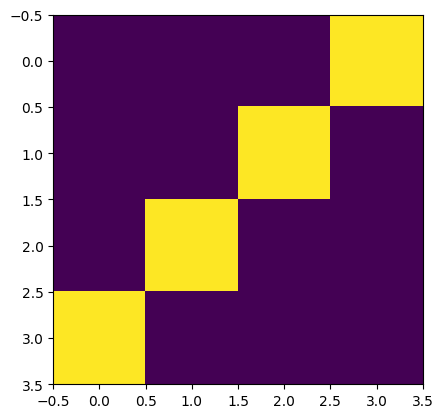

In [4]:
plt.imshow(np.array( [[0, 0, 0, 1],
                      [0, 0, 1, 0],
                      [0, 1, 0, 0],
                      [1, 0, 0, 0]]) )
plt.show()

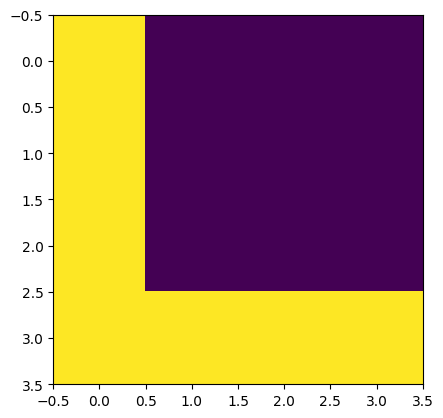

In [5]:
plt.imshow(np.array( [[1, 0, 0, 0],
                      [1, 0, 0, 0],
                      [1, 0, 0, 0],
                      [1, 1, 1, 1]]) )
plt.show()

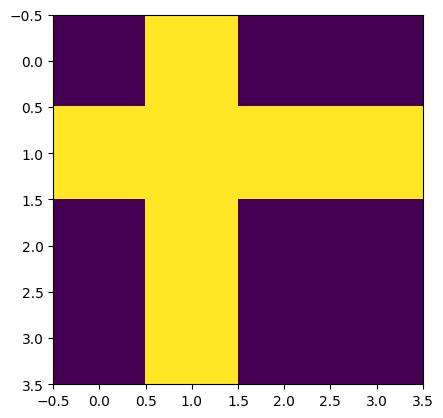

In [6]:
plt.imshow(np.array( [[0, 1, 0, 0],
                      [1, 1, 1, 1],
                      [0, 1, 0, 0],
                      [0, 1, 0, 0]]) )
plt.show()

A következő kód megjeleníti az adatbázis első példányát:

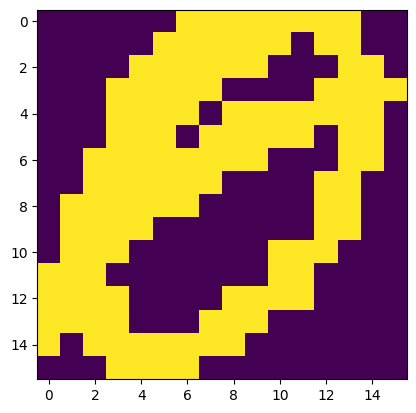

In [7]:
image_size = (16,16)
an_image = np.reshape(data[0,0:256], image_size )
plt.imshow(an_image)
plt.show()

Az előbbihez hasonlóan az adatbázis bármelyik példányát megjeleníthetjük. Ennél azonban elegánsabb megoldás egy interaktív widget segítségével néhány példányt megjeleníteni:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

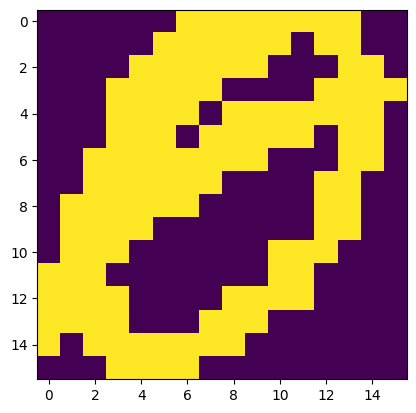

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

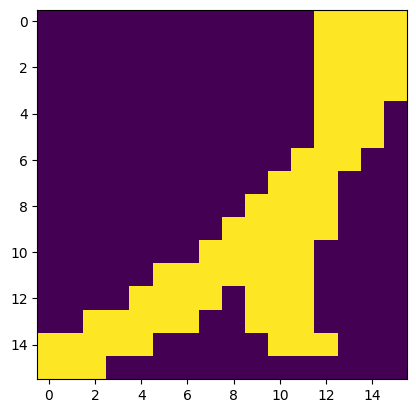

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

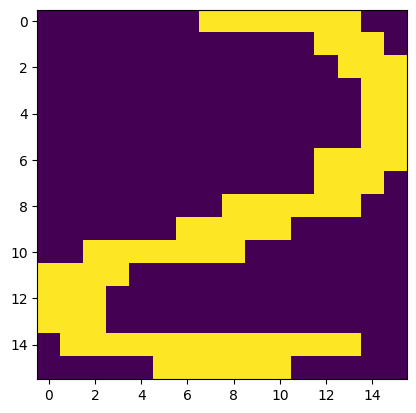

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

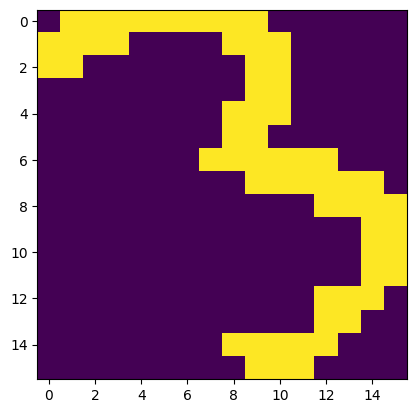

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

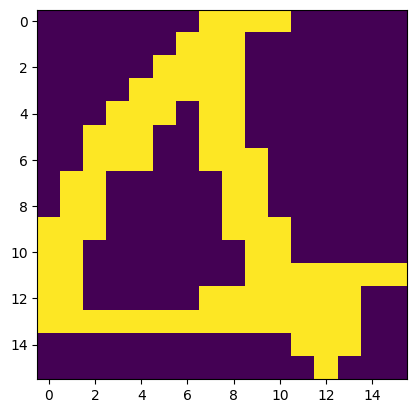

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

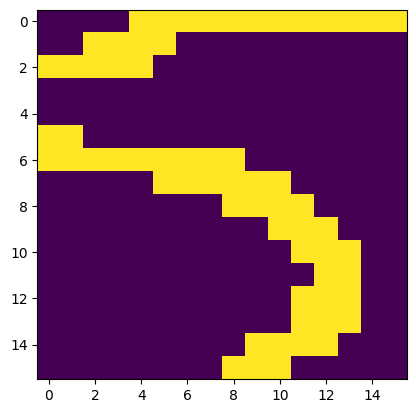

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

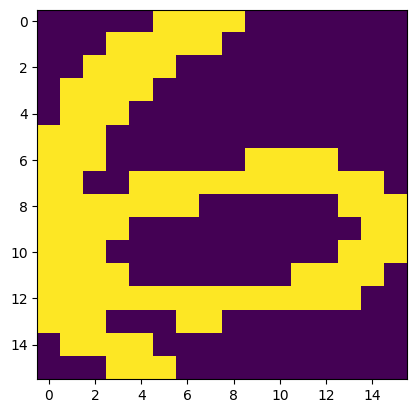

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

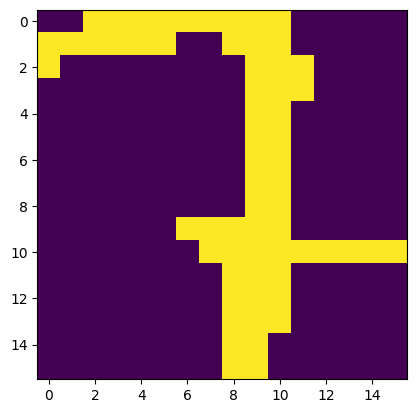

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

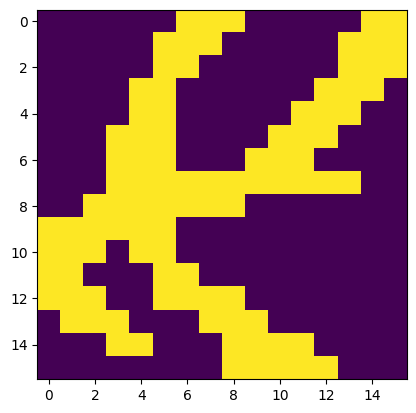

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

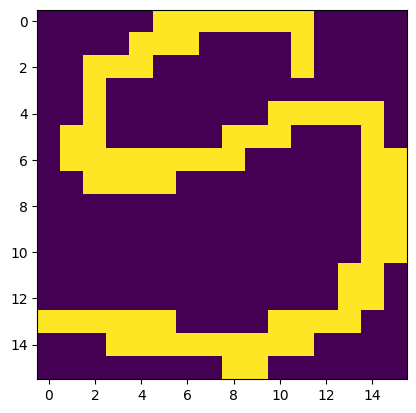

<IPython.core.display.Javascript object>

In [8]:
tb = widgets.TabBar([str(i) for i in range(10)], location='start')
for i in range(10):
  with tb.output_to(i):
    an_image = np.reshape(data[i*20,0:256], image_size )
    plt.imshow(an_image)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

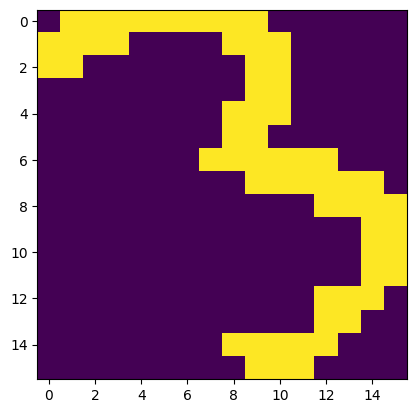

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

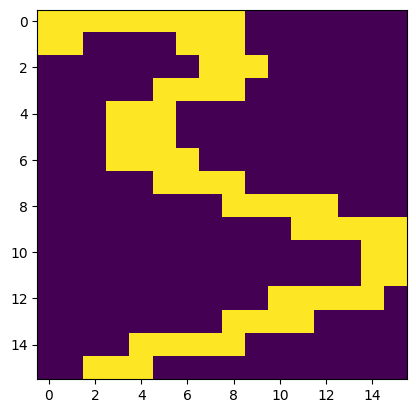

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

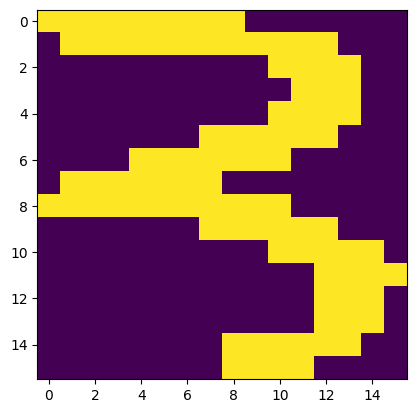

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

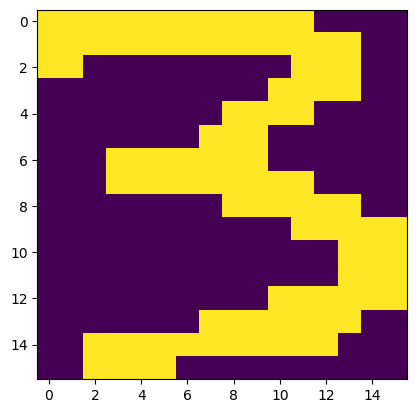

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

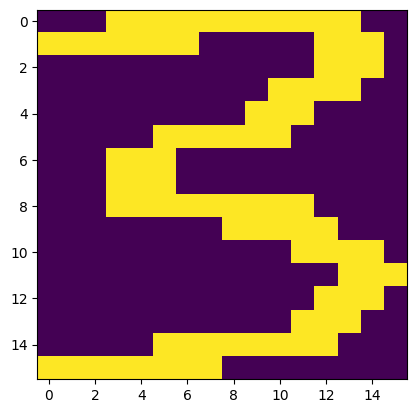

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

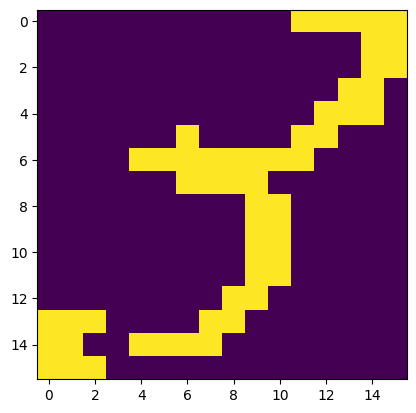

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

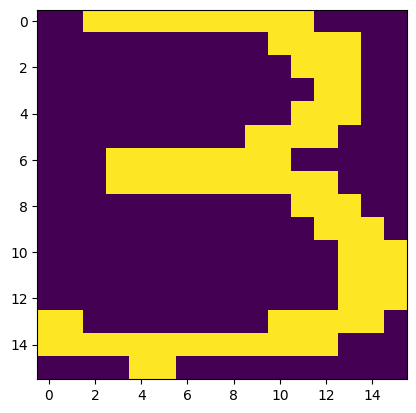

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

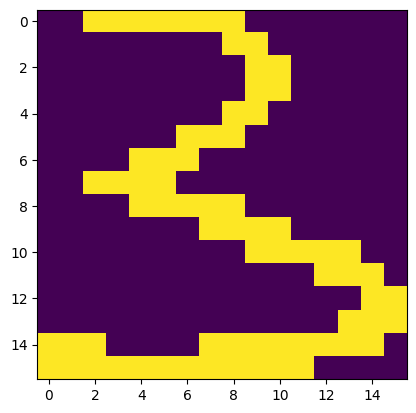

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

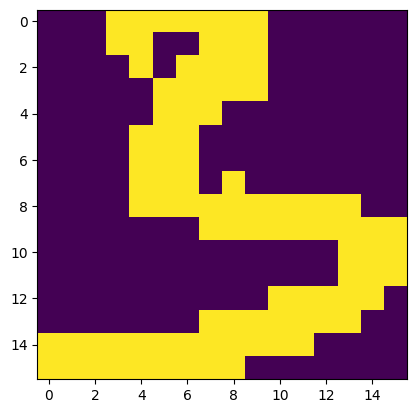

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

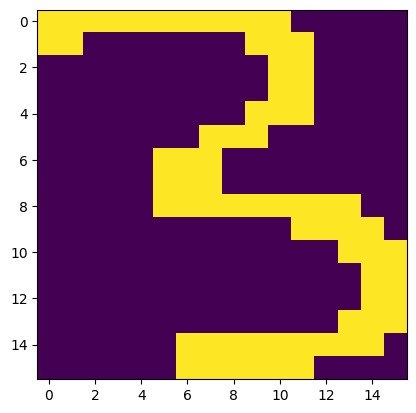

<IPython.core.display.Javascript object>

In [9]:
tb = widgets.TabBar([str(i) for i in range(10)], location='start')
for i in range(10):
  with tb.output_to(i):
    an_image = np.reshape(data[60+i,0:256], image_size )
    plt.imshow(an_image)
    plt.show()

**Adatok előkészítése**

Felosztjuk az adatainkat tanító és teszt adatokra. Az utolsó 500 példány lesz a teszt adathalmaz, a többi a tanítóhalmaz.

In [10]:
train_data = data[:1093,0:256]
train_labels = data[:1093,256:266]
test_data = data[1093:,0:256]
test_labels = data[1093:,256:266]

Az eredeti adatbázisban a címkék ún. *one-hot encoding* formában adottak. Az, hogy tíz számjegy melyike látható egy képen, egy 10 hosszúságú vektorral adott, amelynek pontosan egyetlen eleme 1, a többi nulla.

- Ha a képen '0' számjegy látható, a vektor nulladik eleme 1, a többi nulla;
- ha a képen '1' számjegy látható, a vektor első eleme 1, a többi nulla;
- és így tovább.

Nekünk most arra lesz szükségünk, hogy az osztályok 0-tól 9-ig terjedő egész számokkal legyenek kódolva. Ezért definiálunk egy függvényt, amely az osztálycímkéket előállítja ebben az alakban.

In [11]:
def ordinary_labels(raw_labels):
  o_lab = []
  for i in range(len(raw_labels)):
    o_lab.append( np.argmax(raw_labels[i,:]) )
  return np.array(o_lab)

In [12]:
train_labels = ordinary_labels(train_labels)
test_labels = ordinary_labels(test_labels)

A köveketkezőkben egy neurális hálót definiálunk, amelynek 2 belső (rejtett) rétege van. A bemeneti réteg unit-jainak száma 256, mert egy-egy kép 16x16=256 pixelt tartalmaz. A kimeneti rétegben a 10 osztály mindegyikének egy-egy unit felel meg. Definiálnunk kell a neurális háló által elvégzett számítást leíró forward(...) függvényt is.

In [13]:
# A modell definiálása

class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()
        number_of_units_in_the_first_hidden_layer = 100
        number_of_units_in_the_second_hidden_layer = 50

        self.fc1 = nn.Linear(256,
                             number_of_units_in_the_first_hidden_layer)

        self.fc2 = nn.Linear(number_of_units_in_the_first_hidden_layer,
                             number_of_units_in_the_second_hidden_layer)

        self.out = nn.Linear(number_of_units_in_the_second_hidden_layer,
                             10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

**A háló tanítása:**
- a tanítóadatoból létrehozunk egy tensor datasetet, amelyet egy DataLoader-en keresztül fogunk elérni,
- példányosítjuk a hálót,
- megadjuk a célfüggvényt,
- példányosítjuk az optimalizáló algoritmust,
- végül a tanítóadatokon végighaladva az egyes batchekre elvégezzük az optimalizációs algoritmus egy-egy lépését (for ciklus)

In [14]:
# a modell tanítása

train_dataset = torch.utils.data.TensorDataset(
  torch.Tensor(train_data), torch.LongTensor(train_labels) )
trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=1)

net = DigitRecognizer()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3)

running_loss = 0.0
running_n = 0

for epoch in range(100):
  for inputs, targets in trainloader:
    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_n = running_n + 1


  print('epoch %d, loss: %.3f' % (epoch + 1, running_loss / running_n))
  running_loss = 0.0
  running_n = 0

epoch 1, loss: 2.283
epoch 2, loss: 2.226
epoch 3, loss: 2.126
epoch 4, loss: 1.971
epoch 5, loss: 1.766
epoch 6, loss: 1.512
epoch 7, loss: 1.226
epoch 8, loss: 0.956
epoch 9, loss: 0.739
epoch 10, loss: 0.590
epoch 11, loss: 0.483
epoch 12, loss: 0.412
epoch 13, loss: 0.355
epoch 14, loss: 0.314
epoch 15, loss: 0.279
epoch 16, loss: 0.251
epoch 17, loss: 0.228
epoch 18, loss: 0.208
epoch 19, loss: 0.190
epoch 20, loss: 0.176
epoch 21, loss: 0.160
epoch 22, loss: 0.148
epoch 23, loss: 0.140
epoch 24, loss: 0.127
epoch 25, loss: 0.116
epoch 26, loss: 0.109
epoch 27, loss: 0.102
epoch 28, loss: 0.095
epoch 29, loss: 0.089
epoch 30, loss: 0.083
epoch 31, loss: 0.077
epoch 32, loss: 0.072
epoch 33, loss: 0.068
epoch 34, loss: 0.064
epoch 35, loss: 0.060
epoch 36, loss: 0.056
epoch 37, loss: 0.052
epoch 38, loss: 0.049
epoch 39, loss: 0.047
epoch 40, loss: 0.044
epoch 41, loss: 0.042
epoch 42, loss: 0.039
epoch 43, loss: 0.037
epoch 44, loss: 0.036
epoch 45, loss: 0.033
epoch 46, loss: 0.0

**A háló pontosságának mérése**

Megnézzük, hogy a tesztpéldányok közül hányat sikerül helyesen osztályozni.

In [15]:
test_dataset = torch.utils.data.TensorDataset(
      torch.Tensor(test_data), torch.LongTensor(test_labels)
)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
  for inputs, targets in testloader:
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += targets.size(0)
    correct += (predicted == targets).sum().item()

print("Correct: %d"%(correct))

Correct: 448


A tanítóalgoritmus paramétereinek (pl. epochok száma, tanulási ráta, batch méret) valamint a háló rejtett rétegeinek és a rétegenkénti unitok számának változtatásával próbáljon meg olyan hálót létrehozni, amely a korábbinál nagyobb pontossággal ismeri fel a kézzel írt számjegyeket. Megodásként küldje el e-mail-en a "modell definiálása" és "modell tanítása" című cellákat. Az oktató a modellt a korábbiakhoz hasonló, de azoktól valamelyest eltérő adatokon fogja kiértékelni. Az oktató általi kiértékelés eredménye alapján kerül sor a megoldások rangsorolására és pontozására.